# Auto-Correction Exercise

This exercise will guide you through building an auto-correct system in Python. Follow the instructions in each step to complete the implementation.

## Step 1: Import Libraries

Import the necessary libraries

In [1]:
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
import nltk

## Step 2: Load Data

Load a trusted text corpus to build the auto-correct system.

In [33]:
# Load the corpus
with open('/content/Text Document.txt', 'r', encoding='ISO-8859-1') as f:
    file = f.readlines()

# A small sample of the corpus
file[0][:3000]


'Winn-Dixie files for bankruptcy\n'

## Step 3: Data Processing

Tokenize the text and convert all characters to lowercase to clean the data.

In [34]:
# Your code here to process the data
def process_data(lines):
    wrong_words = [] # here its empty list
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        wrong_words.extend(word)
    return wrong_words
word_l = process_data(file)
vocab = set(word_l)
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['winn', 'dixie', 'files', 'for', 'bankruptcy', 'us', 'supermarket', 'group', 'winn', 'dixie']
There are 174 unique words in the vocabulary.



## Step 4: Architecture Overview

This auto-correct architecture has four main components:

1. **Filtering Mispells**: Check if a word is in the vocabulary.
2. **Word Suggestion Mechanism**: Suggest candidate words based on various edit operations.
3. **Probability Distribution Mechanism**: Calculate the probability of each candidate word.
4. **Replace Mispells**: Replace the misspelled word with the most probable suggestion.

Implement each part step-by-step in the cells below.


### Step 4.1: Filtering Mispells

Write a function to identify words not present in the vocabulary.

In [37]:
def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

find_wrong_word('most of themm', vocab)

['themm']

### Step 4.2: Word Suggestion Mechanism

Implement functions to suggest words by deleting, switching, replacing, or inserting characters.

In [38]:
# Delete letter
def delete_letter(word, verbose=False):
    delete_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")
    return delete_l

delete_word_l = delete_letter(word="hee", verbose=True)

input word : hee 
split_l = [('', 'hee'), ('h', 'ee'), ('he', 'e')], 
delete_l = ['ee', 'he', 'he']


In [39]:
# Switch letter
def switch_letter(word, verbose=False):
    switch_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) > 2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}")
    return switch_l

switch_word_l = switch_letter(word="teh", verbose=True)

Input word = teh 
split_l = [('', 'teh'), ('t', 'eh'), ('te', 'h')] 
switch_l = ['eth', 'the']


In [40]:
# Replace letter

def replace_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l)
        elif len(s[1]) > 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l + s[1][1:])
    replace_set = set(replace_l)
    replace_l = sorted(list(replace_set))
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l = {replace_l}")
    return replace_l

replace_l = replace_letter(word='was', verbose=True)

Input word = was 
split_l = [('', 'was'), ('w', 'as'), ('wa', 's')] 
replace_l = ['aas', 'bas', 'cas', 'das', 'eas', 'fas', 'gas', 'has', 'ias', 'jas', 'kas', 'las', 'mas', 'nas', 'oas', 'pas', 'qas', 'ras', 'sas', 'tas', 'uas', 'vas', 'waa', 'wab', 'wac', 'wad', 'wae', 'waf', 'wag', 'wah', 'wai', 'waj', 'wak', 'wal', 'wam', 'wan', 'wao', 'wap', 'waq', 'war', 'wat', 'wau', 'wav', 'waw', 'wax', 'way', 'waz', 'wbs', 'wcs', 'wds', 'wes', 'wfs', 'wgs', 'whs', 'wis', 'wjs', 'wks', 'wls', 'wms', 'wns', 'wos', 'wps', 'wqs', 'wrs', 'wss', 'wts', 'wus', 'wvs', 'wws', 'wxs', 'wys', 'wzs', 'xas', 'yas', 'zas']


In [41]:
# Insert letter
def insert_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0] + l + s[1])
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    return insert_l

insert_l = insert_letter('ma', True)
print(f"Number of strings output by insert_letter('ma') is {len(insert_l)}")


Input word ma 
split_l = [('', 'ma'), ('m', 'a'), ('ma', '')] 
insert_l = ['ama', 'bma', 'cma', 'dma', 'ema', 'fma', 'gma', 'hma', 'ima', 'jma', 'kma', 'lma', 'mma', 'nma', 'oma', 'pma', 'qma', 'rma', 'sma', 'tma', 'uma', 'vma', 'wma', 'xma', 'yma', 'zma', 'maa', 'mba', 'mca', 'mda', 'mea', 'mfa', 'mga', 'mha', 'mia', 'mja', 'mka', 'mla', 'mma', 'mna', 'moa', 'mpa', 'mqa', 'mra', 'msa', 'mta', 'mua', 'mva', 'mwa', 'mxa', 'mya', 'mza', 'maa', 'mab', 'mac', 'mad', 'mae', 'maf', 'mag', 'mah', 'mai', 'maj', 'mak', 'mal', 'mam', 'man', 'mao', 'map', 'maq', 'mar', 'mas', 'mat', 'mau', 'mav', 'maw', 'max', 'may', 'maz']
Number of strings output by insert_letter('ma') is 78


**Combining Functions for Word Suggestions**

Combine the functions to edit one or two characters in a word.

In [42]:
# Edit one letter
def edit_one_letter(word, allow_switches=True):
    edit_one_set = set() # empty set
    insert_l = insert_letter(word) # insert_l means inser list l refers ti list in all here
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l
    edit_one_set = set(ans)
    return edit_one_set

In [43]:
tmp_word = "in"
tmp_edit_one_set = edit_one_letter(tmp_word)
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word : {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"Number of outputs from edit_one_letter('in') is {len(edit_one_letter('in'))}")

input word : in 
edit_one_l 
['ain', 'an', 'bin', 'bn', 'cin', 'cn', 'din', 'dn', 'ein', 'en', 'fin', 'fn', 'gin', 'gn', 'hin', 'hn', 'i', 'ia', 'ian', 'ib', 'ibn', 'ic', 'icn', 'id', 'idn', 'ie', 'ien', 'if', 'ifn', 'ig', 'ign', 'ih', 'ihn', 'ii', 'iin', 'ij', 'ijn', 'ik', 'ikn', 'il', 'iln', 'im', 'imn', 'ina', 'inb', 'inc', 'ind', 'ine', 'inf', 'ing', 'inh', 'ini', 'inj', 'ink', 'inl', 'inm', 'inn', 'ino', 'inp', 'inq', 'inr', 'ins', 'int', 'inu', 'inv', 'inw', 'inx', 'iny', 'inz', 'io', 'ion', 'ip', 'ipn', 'iq', 'iqn', 'ir', 'irn', 'is', 'isn', 'it', 'itn', 'iu', 'iun', 'iv', 'ivn', 'iw', 'iwn', 'ix', 'ixn', 'iy', 'iyn', 'iz', 'izn', 'jin', 'jn', 'kin', 'kn', 'lin', 'ln', 'min', 'mn', 'n', 'ni', 'nin', 'nn', 'oin', 'on', 'pin', 'pn', 'qin', 'qn', 'rin', 'rn', 'sin', 'sn', 'tin', 'tn', 'uin', 'un', 'vin', 'vn', 'win', 'wn', 'xin', 'xn', 'yin', 'yn', 'zin', 'zn']

Number of outputs from edit_one_letter('in') is 129


In [44]:
# Edit two letters
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''

    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = [] # refers to answers
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))

    edit_two_set = set(ans)

    return edit_two_set

In [45]:
tmp_edit_two_set = edit_two_letters("i")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'in' is {len(edit_two_letters('in'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aai', 'ab', 'abi', 'ac', 'aci', 'ad', 'adi']
Last 10 strings ['zv', 'zvi', 'zw', 'zwi', 'zx', 'zxi', 'zy', 'zyi', 'zz', 'zzi']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'in' is 7154


### Step 4.3: Probability Distribution

Calculate the frequency of each word in the corpus and compute the probability distribution.

In [46]:

def get_count(word_l):
    word_count_dict = Counter(word_l)
    return word_count_dict

word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'for' is {word_count_dict.get('for',0)}")


There are 174 key values pairs
The count for the word 'for' is 2


In [48]:
def get_probs(word_count_dict):
    probs = {}
    total = sum(word_count_dict.values())
    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word] / total
    return probs

probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('say') is {probs['say']:.4f}")

Length of probs is 174
P('say') is 0.0037


<Axes: xlabel='word'>

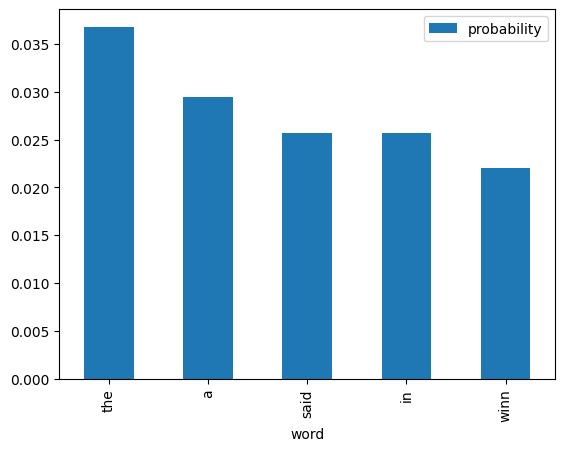

In [49]:
# Display probability distribution
prob_df = pd.DataFrame({'word': probs.keys(), 'probability': probs.values()}).sort_values(by='probability', ascending=False)
prob_df.sample(5)

prob_df.head().plot.bar(x='word', y='probability')


### Step 4.4: Replace Misspells with Correction

Write a function to replace misspelled words with the most probable corrections.

In [51]:
# Your code here to replace misspells

def get_corrections(word, probs, vocab, n=2, verbose=False):
    suggestions = []
    n_best = []

    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)

    best_words = sorted({s: probs[s] for s in suggestions}.items(), key=lambda x: x[1], reverse=True)
    n_best = best_words

    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)
    return n_best

def get_correct_word(word, vocab, probs, n):
    corrections = get_corrections(word, probs, vocab, n, verbose=False)
    if len(corrections) == 0:
        return word

    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word

get_correct_word('byy', vocab, probs, 100)

'by'

### Step 5: Final Auto-Correction Function

Combine all parts into a final function that corrects sentences.

In [52]:
# Your code here for the final auto-correction function
def autocorrect(sentence, vocab, probs):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    correct_words = []
    for word in sentence.strip().lower().split(" "):
        if word in wrong_words:
            correct_word = get_correct_word(word, vocab, probs, 15)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())

### Step 6: Demo

Apply your work to a sentence

In [54]:
autocorrect("number of storess", vocab, probs)

Input sentence :  number of storess
Wrong words :  ['storess']
Output Sentence :  Number of stores


In [56]:
autocorrect("he saiid", vocab, probs)

Input sentence :  he saiid
Wrong words :  ['saiid']
Output Sentence :  He said
